# Preprocessing + Otsu testing using the Dice score algorithm!

**UPDATES**
**Testing (05.06.2022)**

- Dice score around 60-70 % 
- stretching issue resolved 
- second test round complete

- ALL Dice scores computed !! (whole dataset)

**To-Do:**

- optimize preprocessing -> optimal filter size
- optimal bin size 



In [1]:
#Packages
%pylab
%matplotlib inline
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu as ot
#from images_segmentation import dicescore as dice 
import os

Using matplotlib backend: <object object at 0x000002845C823630>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [33]:
from PIL import Image
import os, os.path

imgs = []
path = r"data\Otsu_data\NIH3T3\img"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(imread(os.path.join(path,f)))

imgs_gt = []
path = r"data\Otsu_data\NIH3T3\gt"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs_gt.append(imread(os.path.join(path,f)))

imgs_1 = []
path = r"data\Otsu_data\N2DH-GOWT1\img"
valid_images = [".jpg",".gif",".png",".tif"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs_1.append(imread(os.path.join(path,f)))

imgs_gt_1 = []
path = r"data\Otsu_data\N2DH-GOWT1\gt"
valid_images = [".jpg",".gif",".png",".tif"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs_gt_1.append(imread(os.path.join(path,f)))

imgs_2 = []
path = r"data\Otsu_data\N2DL-HeLa\img"
valid_images = [".jpg",".gif",".png",".tif"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs_2.append(imread(os.path.join(path,f)))

imgs_gt_2 = []
path = r"data\Otsu_data\N2DL-HeLa\gt"
valid_images = [".jpg",".gif",".png",".tif"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs_gt_2.append(imread(os.path.join(path,f)))



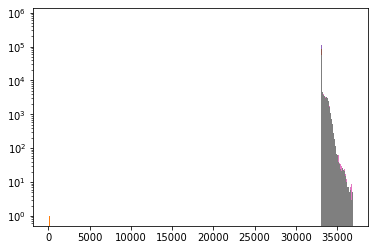

In [34]:
otsu_1 = []
for i in range(0,len(imgs)):
    otsu_1.append(ot.otsu_thresholding(imgs[i],256)) 

otsu_2 = []
for i in range(0,len(imgs_1)):
    otsu_2.append(ot.otsu_thresholding(imgs_1[i],256)) 

otsu_3 = []
for i in range(0,len(imgs_2)):
    otsu_3.append(ot.otsu_thresholding(imgs_2[i],256)) 



In [25]:
tresholded = otsu_1
ground_truth = imgs_gt
dsc = []
for j in range(0,len(otsu_1)):
        dsc.append(f_dice(j))
print(dsc)

[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]


In [35]:
tresholded = otsu_2
ground_truth = imgs_gt_1
dsc_1 = []
for j in range(0,len(otsu_2)):
        dsc_1.append(f_dice(j))
print(dsc_1)

[0.5705017182130584, 0.5321692131795032, 0.568002229254991, 0.5830196570472606, 0.6502180828858916, 0.588161094224924]


In [36]:
tresholded = otsu_3
ground_truth = imgs_gt_2
dsc_2 = []
for j in range(0,len(otsu_3)):
        dsc_2.append(f_dice(j))
print(dsc_2)

[0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297]


In [2]:
#Images
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
gt_3 = imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg13.tif")
gt_1 = imread(r"data\Otsu_data\NIH3T3\gt\44.png")
gt_2 = imread(r"data\Otsu_data\N2DH-GOWT1\gt\man_seg39.tif")

In [37]:
# histogram stretching algorithm
def stretch(x):
    intensities = []
    img = x.copy()
    lower_quantile, upper_quantile = np.percentile(img, (2, 100 - 2))

    img[img < lower_quantile] = lower_quantile
    img[img > upper_quantile] = upper_quantile
    
    for i in np.ndindex(img.shape):
        intensities.append(img[i])
    img_max = max(intensities)
    img_min = min(intensities)
    for j in np.ndindex(img.shape):
        img[j]= (img[j]-img_min)*(256 /(img_max-img_min))
    return img 

In [91]:
#Preprocessing
#median1 = scipy.ndimage.median_filter(img_1, 3)
#gauss1 = scipy.ndimage.gaussian_filter(img_1,3)

#median2 = scipy.ndimage.median_filter(img_2, 3)
#gauss2 = scipy.ndimage.gaussian_filter(img_2,3)

#median3 = scipy.ndimage.median_filter(img_3, 3)
#gauss3 = scipy.ndimage.gaussian_filter(img_3,3)

stretch1 = stretch(img_1)
stretch2 = stretch(img_2)
stretch3 = stretch(img_3)

#stretch4 = stretch(median1)
#stretch5 = stretch(median2)
#stretch6 = stretch(median3)

#stretch7 = stretch(gauss1)
#stretch8 = stretch(gauss2)
#stretch9 = stretch(gauss3)

#median4 = scipy.ndimage.median_filter(stretch1, 3)
#median5 = scipy.ndimage.median_filter(stretch2, 10)
#median6 = scipy.ndimage.median_filter(stretch3, 11)

gauss4 = scipy.ndimage.gaussian_filter(stretch1,3)
gauss5 = scipy.ndimage.gaussian_filter(stretch2,3)
gauss6 = scipy.ndimage.gaussian_filter(stretch3,3)


'pt8 = ot.otsu_thresholding(median1,256)\npt9 = ot.otsu_thresholding(median2,256)\npt10 = ot.otsu_thresholding(median3,256)\n\npt11 = ot.otsu_thresholding(gauss1,256)\npt12 = ot.otsu_thresholding(gauss2,256)\npt13 = ot.otsu_thresholding(gauss3,256)'

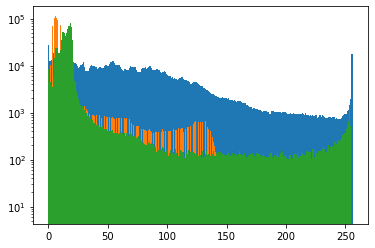

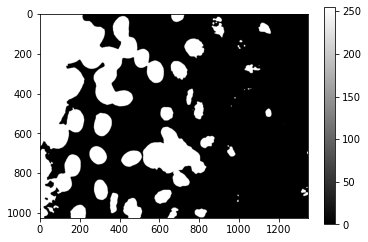

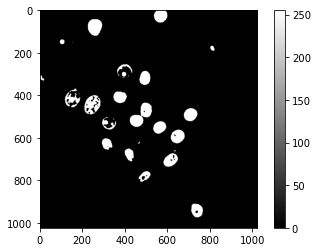

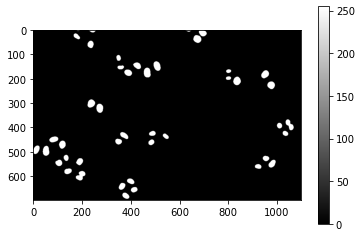

In [93]:
#Otsu
'''pt1 = ot.otsu_thresholding(img_1,256)
pt2 = ot.otsu_thresholding(img_2,256)
pt3 = ot.otsu_thresholding(img_3,256)'''

pt4 = ot.otsu_thresholding(gauss4,256)
pt5 = ot.otsu_thresholding(gauss5,256)
pt6 = ot.otsu_thresholding(gauss6,256)

figure()  
imshow(pt4, 'gray')
colorbar()

figure()  
imshow(pt5, 'gray')
colorbar()

figure()  
imshow(pt6, 'gray')
colorbar()


'''pt8 = ot.otsu_thresholding(median1,256)
pt9 = ot.otsu_thresholding(median2,256)
pt10 = ot.otsu_thresholding(median3,256)

pt11 = ot.otsu_thresholding(gauss1,256)
pt12 = ot.otsu_thresholding(gauss2,256)
pt13 = ot.otsu_thresholding(gauss3,256)'''

In [19]:

def b_dice(x): # POSITIVE PIXELS = BACKGROUND x=picture number, same number for gt and post tresholding image):
    gt = ground_truth[x] #gt picture x
    pt = tresholded[x] #post tresholding picture x
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]==0:
            if pt[x,y]==0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]==0:
                fp+=1
            else:
                tn+=1 #not really needed, but does not influence the runtime
    b_dsc= 2*tp/(2*tp+fn+fp)
    return b_dsc
    print(b_dsc)

def f_dice(x): # POSITIVE PIXELS = FOREGROUND
    gt = ground_truth[x] 
    pt = tresholded[x] 
    tp=0
    tn=0
    fp=0
    fn=0
    h = gt.shape[0]
    w = gt.shape[1]
    for x, y in np.ndindex((h,w)):
        if gt[x,y]!=0:
            if pt[x,y]!=0:
                tp+=1
            else:
                fn+=1
        else:
            if pt[x,y]!=0:
                fp+=1
            else:
                tn+=1 
    f_dsc= 2*tp/(2*tp+fn+fp)
    return f_dsc
    
    

In [94]:
#Dice score



tresholded = [pt4,pt5,pt6]
ground_truth = [gt_1,gt_2,gt_3]
dsc = ['foreground dice ' + str(f_dice(0)), 'background dice ' + str(b_dice(0)),
        'foreground dice ' + str(f_dice(1)), 'background dice ' + str(b_dice(1)),
        'foreground dice ' + str(f_dice(2)), 'background dice ' + str(b_dice(2))]
print(dsc)



['foreground dice 0.5941665864492086', 'background dice 0.854285886392386', 'foreground dice 0.7292286234178483', 'background dice 0.9828741721384242', 'foreground dice 0.8094224700961327', 'background dice 0.9930070306672806']


**Erste Ergebnisse:**

**Nur Otsu:**  
- 1.Img: 57,58 %  
- 2.Img: 58,30 %   
- 3.Img: 69,61 %   
- NIH3T3: 

[0.8943783223933183, 0.8845252721173281, 0.8248360803970239, 0.7345417270163801, 0.7304073649082119, 0.6728102311790894, 0.6711519137663287, 0.7237186625334818, 0.03844935467277361, 0.482970126366923, 0.0, 0.680536637820677, 0.00026339009389856846, 0.5757554586315079, 0.6165448260228947, 0.07605520913993832, 0.07186834004262373, 0.7965485556767932]

- N2DH-GOWT1:

[0.5705017182130584, 0.5321692131795032, 0.568002229254991, 0.5830196570472606, 0.6502180828858916, 0.588161094224924]

- N2DL-HeLa:

[0.6961222399023476, 0.65534219596258, 0.7806862514268343, 0.7806012094816297]

**Gestretcht:**
- 1.Img: 59,70%  
- 2.Img  53,19%       
- 3.Img: 80,97%  

**Median:** -> Filter size 
- 1.Img: 56,93 %   
- 2.Img: 59,99 %  
- 3.Img: 66,50 %   

**Gauss:** -> Filter size
- 1.Img: 55,94 %   
- 2.Img: 65,74 %   
- 3.Img: 61,53 %   

**Median+Stretching**
- 1.Img: 59,71 % 
- 2.Img: 55,45 % 
- 3.Img: 80,97 % 

**Gauss+Stretching**
- 1.Img: 59,43 % 
- 2.Img: 72,92 % 
- 3.Img: 80,94 % 
